In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('waca_test_centuries.csv') #read the csv file using pandas

In [3]:
print('Number of centuries are:',data.shape[0]) #print the shape of the data frame

Number of centuries are: 89


# Q1. Number of centuries scored by each country at WACA

           Team  No.
0     Australia   47
1       England   12
2         India    3
3   New Zealand    8
4      Pakistan    3
5  South Africa    7
6     Sri Lanka    1
7   West Indies    8


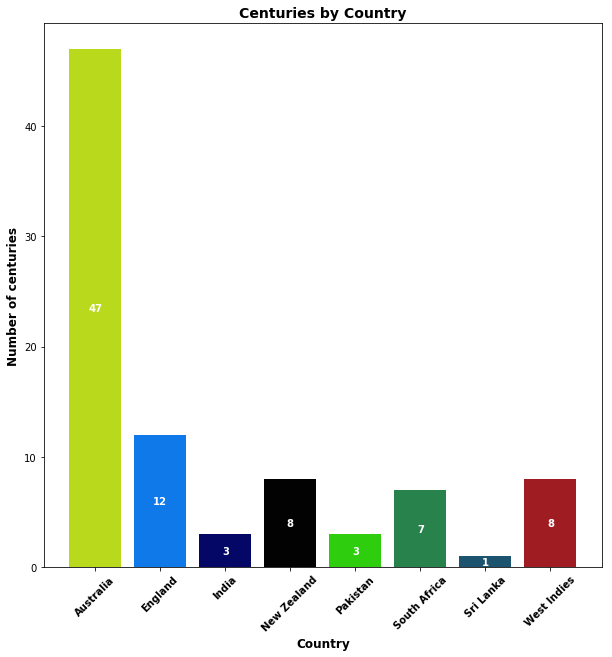

In [4]:
plt.figure(figsize=(10,10)) # Specify the figure size beforehand

# Grouping by Team on basis of count of centuries
df=data[['No.','Team']].groupby(['Team'],as_index=False).count() #if as_index=True, return object with group labels as the index
y=df['No.']  #extract only the No. column
labels=df['Team'] #extract only the Team column x axis
print(df)
bar = plt.bar(labels,y,color = ['#b9d91d', '#1079ea', '#040766', '#020202', '#2ece0e', '#27824c', '#1c5470', '#a01c23']) #create a bar plot
plt.xticks(labels,rotation=45,fontweight="bold") #set bar labels on the x axis x ticks are label

# Labelling our plot
plt.title('Centuries by Country',fontsize=14,fontweight="bold") #set the title of the plot
plt.ylabel('Number of centuries',fontsize=12,fontweight="bold") #set the y axis label
plt.xlabel('Country',fontsize=12,fontweight='bold') #set the x axis label
# plt.tight_layout() 

# Displaying value for each bar
for b in bar:
    height = b.get_height()
    #print(b.get_height(),b.get_x(),b.get_width()) get_x() gives starting position of the bar graph
    plt.text(b.get_x()+b.get_width()/2,(height-1)/2,height,ha='center',va='bottom',fontweight="bold",fontsize=10,color="white")
    
plt.show()

# Q2. Result when home batsman scores a century

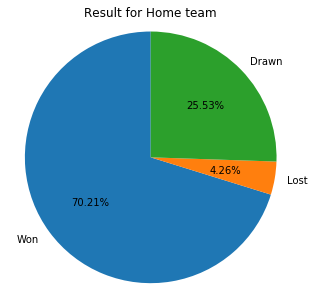

In [5]:
plt.figure(figsize=(5,5)) #x,y 
df = data[['No.','Score','Team','Result']] #select only the specified columns
total_centuries = len(df[df.Team=='Australia']) #find total centuries scored by Australia will give the result and with help of shape we counted total number of rows
# print(total_centuries)
matches_won = len(df[(df.Team=='Australia') & (df.Result=='Won')]) #find total matches of Australia which were won
# print(matches_won)
matches_lost = len(df[(df.Team=='Australia') & (df.Result=='Lost')]) #find total matches of Australia which were lost
matches_drawn = len(df[(df.Team=='Australia') & (df.Result=='Drawn')]) #find total matches of Australia which were drawn
sizes=[matches_won/total_centuries, matches_lost/total_centuries, matches_drawn/total_centuries] #find percentages of matches won, lost and drawn
label=['Won', 'Lost', 'Drawn']
plt.pie(sizes, labels=label, autopct='%.2f%%', startangle=90) #create a pie chart with percent labels on them
plt.axis('equal') #make x and y axis equal
# plt.tight_layout()
plt.title('Result for Home team') #title for the pie chart
plt.show()

# Q3. Result when away batsman scores a century

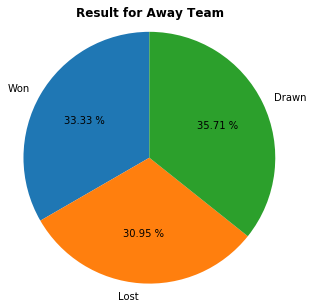

In [6]:
plt.figure(figsize=(5,5))
df=data[['No.','Score','Team','Result']]
total_centuries=df[df.Team!='Australia'].shape[0]
matches_won=len(df[(df.Team!='Australia') & (df.Result=='Won')])
matches_drawn=len(df[(df.Team!='Australia') & (df.Result=='Drawn')])
matches_lost=len(df[(df.Team!='Australia') & (df.Result=='Lost')])
sizes=[matches_won/total_centuries, matches_lost/total_centuries, matches_drawn/total_centuries]
labels=['Won', 'Lost', 'Drawn']
plt.pie(sizes,labels=labels,autopct="%.2f %%",startangle=90)
plt.axis('equal')
# plt.tight_layout()
plt.title("Result for Away Team", fontweight = "bold")
plt.show()

# Q4 Centuries scored in different innings

   Inns.  No.
0      1   29
1      2   25
2      3   29
3      4    6


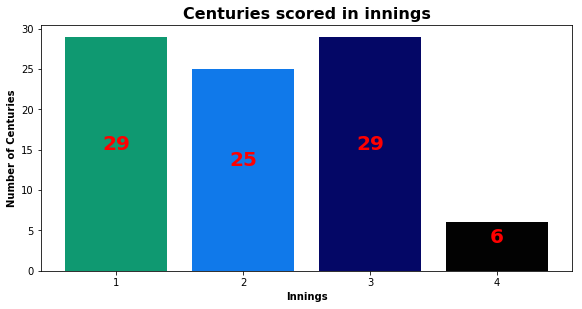

In [7]:
plt.figure(figsize=(8,4))
inns_df=data[['No.','Inns.']].groupby(['Inns.'],as_index=False).count()
print(inns_df)
x=inns_df['Inns.']
y=inns_df['No.']
bar = plt.bar(x,y,color = ['#0f9971', '#1079ea', '#040766', '#020202'])
plt.xticks(x)
for b in bar:
    height=b.get_height()
    plt.text(b.get_x()+b.get_width()/2,height/2,height,color="red",fontweight="bold",ha="center",va="bottom",fontsize=20)
plt.tight_layout()
plt.title("Centuries scored in innings",fontweight="bold",fontsize=16)
plt.xlabel("Innings", fontweight = "bold")
plt.ylabel("Number of Centuries", fontweight = "bold")
plt.show()

# Q5 Strike rate by innings

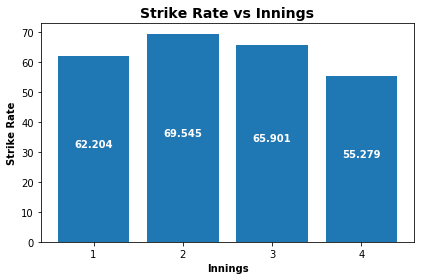

In [8]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df=data[['No.','Inns.','Score','Balls']]
df['Score'] = df['Score'].str.strip('*') #strip * from the score column data
df['Score'] = df['Score'].astype(int) #cast the score column data to int
df['StrikeRate']=df['Score']/df['Balls'] * 100
df.sort_values('StrikeRate',ascending=False,inplace=True)
sr_df=df[['StrikeRate','Inns.']].groupby(['Inns.'],as_index=False).mean() #group by innings column while taking the mean
x=sr_df['Inns.']

y=sr_df['StrikeRate']
bar=plt.bar([1,2,3,4],y)
plt.xticks([1,2,3,4])

for b in bar:
    height=b.get_height()
    plt.text(b.get_x()+b.get_width()/2,height/2,round(height,3),color="white",va="bottom",ha="center",fontweight="bold") #set label for each bar

plt.title("Strike Rate vs Innings", fontsize = 14, fontweight = "bold")
plt.xlabel("Innings", fontweight = "bold")
plt.ylabel("Strike Rate", fontweight = "bold")
plt.tight_layout()
plt.show()

# Q6. Conversion into big final scores

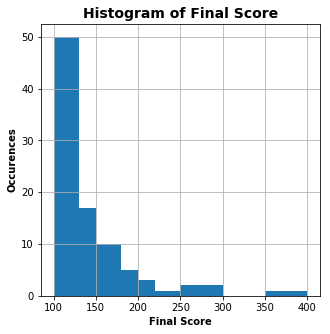

In [9]:
plt.figure(figsize=(5,5))
data['Score'] = data['Score'].str.strip('*')
data['Score'] = data['Score'].astype(int)
plt.hist(data.Score,bins=[100,130,150,180,200,220,250,300,350,400]) #create a histogram
plt.title("Histogram of Final Score", fontsize = 14, fontweight = "bold")
plt.xlabel("Final Score", fontweight = "bold")
plt.ylabel("Occurences", fontweight = "bold")
plt.grid(True) #show grid for the plot
plt.show()

In [10]:
sorted(data.Score,reverse=True)[0:6] # Top 6 scores

[380, 290, 253, 239, 219, 203]